<a href="https://colab.research.google.com/github/Alirezanltv/OCR/blob/Alireza_Kanani/OCR_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow
# !pip install python-doctr[tf]
# PyTorch
!pip install python-doctr[torch]

In [ ]:
# Install the most up-to-date version from GitHub
# TensorFlow
# !pip install -e git+https://github.com/mindee/doctr.git#egg=python-doctr[tf]
# PyTorch
!pip install -e git+https://github.com/mindee/doctr.git#egg=python-doctr[torch]

In [ ]:
# Install some free fonts for result rendering
!sudo apt-get install fonts-freefont-ttf -y
# !sudo apt-get install fonts-farsiweb -y

In [ ]:
%matplotlib inline
import os

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from doctr.models import detection_predictor
from doctr.models import recognition_predictor


# If we have a image file and we should convert it into a pdf file

# perspective Distortion

In [ ]:
import cv2
import numpy as np
def auto_correct_perspective(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the contours of the image
    contours, hierarchy = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contours[0])

    # Define the points of the original image
    pts1 = np.float32([[x,y], [x+w,y], [x,y+h], [x+w,y+h]])

    # Define the points of the desired perspective
    pts2 = np.float32([[0,0], [300,0], [0,300], [300,300]])

    # Calculate the perspective transformation matrix
    M = cv2.getPerspectiveTransform(pts1, pts2)

    # Apply the perspective transformation to the image
    dst = cv2.warpPerspective(img, M, (400,400))

    # Save the corrected image
#     cv2.imwrite('corrected_image.jpg', dst)

    # Return the corrected image
    return dst

# Call the auto_correct_perspective function with your image path

dst = auto_correct_perspective("/content/steamtest.png")
cv2.imwrite('corrected_image.jpg', dst)

True

# Turn image to PDF

In [ ]:
!pip install img2pdf

In [ ]:
import img2pdf
from PIL import Image

# Open the image file
with Image.open('/content/steamfinal.png') as img:
    # Convert the image to PDF data
    pdf_data = img2pdf.convert(img.filename)

    # Create a new PDF file
    with open('steamfinal.pdf', 'wb') as output_file:
        # Write the PDF data to the new PDF file
        output_file.write(pdf_data)

In [ ]:
# Download a sample
# !wget https://eforms.com/download/2019/01/Cash-Payment-Receipt-Template.pdf
# Read the file
doc = DocumentFile.from_pdf("/content/steamfinal.pdf")
print(f"Number of pages: {len(doc)}")

Number of pages: 1


In [ ]:
# Instantiate a pretrained model
predictor = ocr_predictor('db_resnet50', pretrained=True)

In [ ]:
# Display the architecture
print(predictor)

In [ ]:
result = predictor(doc)

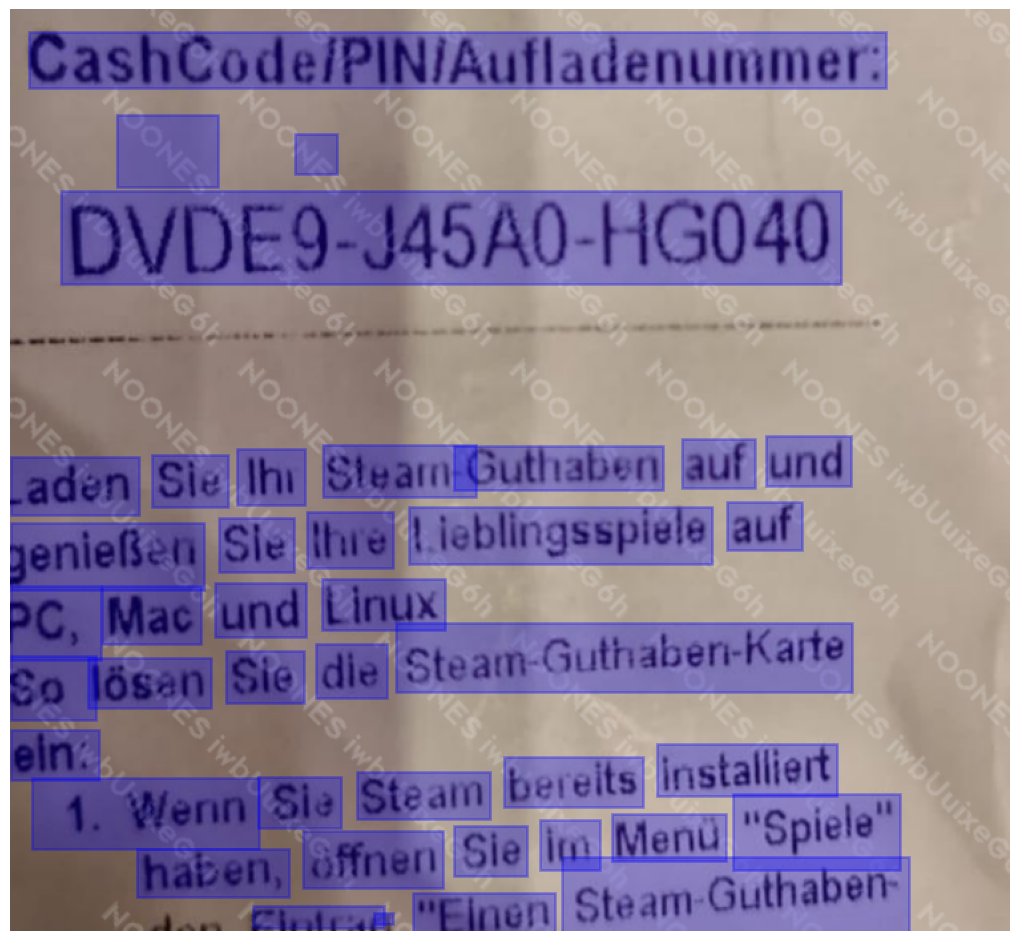

In [ ]:
result.show(doc)

In [ ]:
result.render

In [ ]:
result.pages[0]

# Easy OCR

In [ ]:
!pip install easyocr

In [ ]:
import easyocr

In [ ]:
reader = easyocr.Reader(['en'])  # Initializes the reader with English as the language


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
results = reader.readtext('/content/steamtest.png')


In [ ]:
results[1][1].split()

['DVDE9-J45AO-HGO40']

In [ ]:
codes=[]
for i in range(0, len(results)):
  for word in results[i][1].split():
    # print(word)
    if len(word)==17 and word[5] == '-':
      codes.append(word)
      # print(word , results[i+1][1] , word+results[i+1][1])
    if 9<len(word)<16 and word[5] == '-' :
    
      codes.append((word + "-" + results[i+1][1]))
codes

['ET740-LPOHO-3JNES']

# Microsoft OCR

In [ ]:
!pip install --upgrade azure-cognitiveservices-vision-computervision

In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = "PASTE_YOUR_COMPUTER_VISION_KEY_HERE"
endpoint = "PASTE_YOUR_COMPUTER_VISION_ENDPOINT_HERE"

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'''
OCR: Read File using the Read API, extract text - remote
This example will extract text in an image, then print results, line by line.
This API call can also extract handwriting style text (not shown).
'''
print("===== Read File - remote =====")
# Get an image with text
read_image_url = "https://raw.githubusercontent.com/MicrosoftDocs/azure-docs/master/articles/cognitive-services/Computer-vision/Images/readsample.jpg"

# Call API with URL and raw response (allows you to get the operation location)
read_response = computervision_client.read(read_image_url,  raw=True)

# Get the operation location (URL with an ID at the end) from the response
read_operation_location = read_response.headers["Operation-Location"]
# Grab the ID from the URL
operation_id = read_operation_location.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# Print the detected text, line by line
if read_result.status == OperationStatusCodes.succeeded:
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)
print()
'''
END - Read File - remote
'''

print("End of Computer Vision quickstart.")